In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [2]:
data = pd.read_csv(".\input\mitbih_train.csv", header=None)
df = pd.DataFrame(data)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

<AxesSubplot:xlabel='187', ylabel='count'>

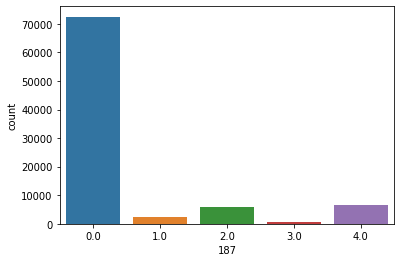

In [5]:
#df.value_counts()
classes = []
sns.countplot(x=187, data = df) 

In [6]:
class_1 = df[df[187]==1.0]
class_2 = df[df[187]==2.0]
class_3 = df[df[187]==3.0]
class_4 = df[df[187]==4.0]
class_0 = df[df[187]==0.0].sample(n = 8000)

In [7]:
new_df = pd.concat([class_0, class_1, class_2, class_3, class_4])

In [8]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
21711,0.000000,0.167742,0.248387,0.341935,0.380645,0.367742,0.370968,0.383871,0.403226,0.403226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58549,1.000000,0.841667,0.455556,0.000000,0.147222,0.266667,0.361111,0.363889,0.391667,0.394444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64889,0.969336,0.947189,0.548552,0.057922,0.047700,0.294719,0.410562,0.410562,0.410562,0.425894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10417,1.000000,0.898039,0.570588,0.298039,0.260784,0.170588,0.117647,0.147059,0.139216,0.107843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68388,1.000000,0.913706,0.515228,0.208122,0.078680,0.091371,0.055838,0.045685,0.017766,0.025381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87553,0.901506,0.845886,0.800695,0.748552,0.687138,0.599073,0.512167,0.427578,0.395133,0.402086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


<AxesSubplot:xlabel='187', ylabel='count'>

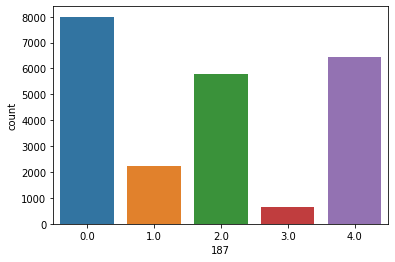

In [10]:
sns.countplot(x=187, data = new_df) 

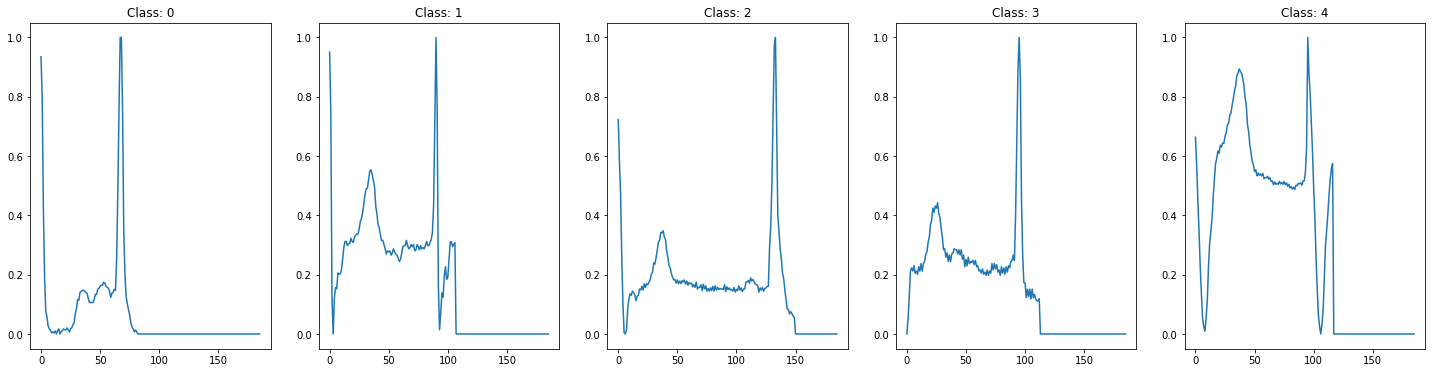

In [11]:
index = 0

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(25,6))

for i in range(5):
  ax[i].plot(new_df[new_df[187]==float(i)].sample(1).iloc[0,:186])
  ax[i].set_title('Class: '+str(i))

In [12]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df.drop([187], axis=1), new_df[187], test_size = 0.1)

In [13]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [14]:
from keras.utils.np_utils import to_categorical

y_train=keras.utils.np_utils.to_categorical(y_train)
y_test=keras.utils.np_utils.to_categorical(y_test)

In [15]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout , Conv2D

In [16]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
model.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))

model.add(Dense(units = 5, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 187, 32)           128       
                                                                 
 conv1d_1 (Conv1D)           (None, 187, 64)           6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 187, 128)          41088     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 94, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 94, 128)           0         
                                                                 
 flatten (Flatten)           (None, 12032)             0         
                                                        

In [17]:
callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [18]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50 , callbacks=callbacks, batch_size=32)
model.load_weights('best_model.h5')

Epoch 1/50
650/650 [==============================] - 73s 111ms/step - loss: 0.3829 - accuracy: 0.8639 - val_loss: 0.2227 - val_accuracy: 0.9233
Epoch 2/50
650/650 [==============================] - 67s 103ms/step - loss: 0.2053 - accuracy: 0.9308 - val_loss: 0.1693 - val_accuracy: 0.9411
Epoch 3/50
650/650 [==============================] - 56s 87ms/step - loss: 0.1584 - accuracy: 0.9468 - val_loss: 0.1383 - val_accuracy: 0.9545
Epoch 4/50
650/650 [==============================] - 55s 85ms/step - loss: 0.1238 - accuracy: 0.9586 - val_loss: 0.1342 - val_accuracy: 0.9541
Epoch 5/50
650/650 [==============================] - 61s 94ms/step - loss: 0.1021 - accuracy: 0.9632 - val_loss: 0.1260 - val_accuracy: 0.9606
Epoch 6/50
650/650 [==============================] - 60s 93ms/step - loss: 0.0889 - accuracy: 0.9690 - val_loss: 0.1799 - val_accuracy: 0.9333
Epoch 7/50
650/650 [==============================] - 57s 88ms/step - loss: 0.0835 - accuracy: 0.9712 - val_loss: 0.1425 - val_accurac

In [19]:
# Prediction

y_pred = model.predict(X_test)

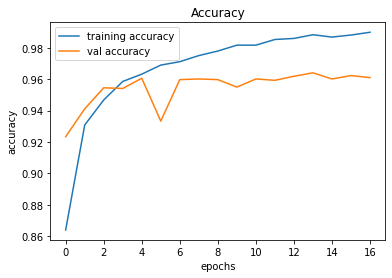

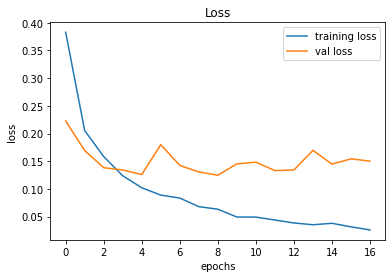

In [20]:
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [21]:
loss,accuracy=model.evaluate(X_test,y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

73/73 [==============================] - 1s 12ms/step - loss: 0.1248 - accuracy: 0.9597
Test loss: 0.12476155906915665
Test accuracy: 0.9597228169441223


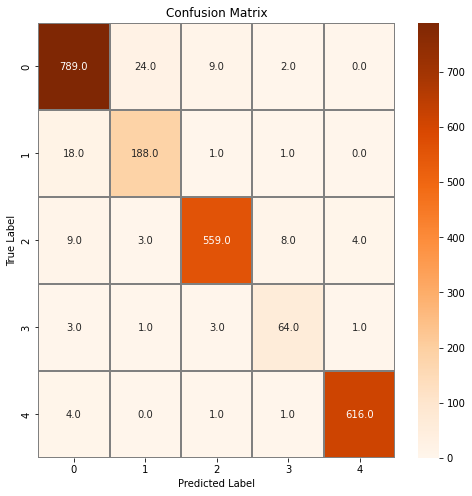

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Oranges",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [23]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       824
           1       0.87      0.90      0.89       208
           2       0.98      0.96      0.97       583
           3       0.84      0.89      0.86        72
           4       0.99      0.99      0.99       622

    accuracy                           0.96      2309
   macro avg       0.93      0.94      0.93      2309
weighted avg       0.96      0.96      0.96      2309



In [24]:
model.save("ecg_hearbeat_cnn_model")

INFO:tensorflow:Assets written to: ecg_hearbeat_cnn_model\assets
